# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
df['DTNASC'] = pd.to_datetime(df['DTNASC'])

In [4]:
df['MES'] = df['DTNASC'].apply(lambda x: x.strftime('%b'))

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
df['FAIXALAT'] = df['munResLat'].apply(lambda x: 'abaixo de -10.5' if x < -10.5 else 'acima de -10.5')
df[['munResLat','FAIXALAT']]

,munResLat,FAIXALAT
0,-11.93554,abaixo de -10.5
1,-11.93554,abaixo de -10.5
2,-11.93554,abaixo de -10.5
3,-12.13178,abaixo de -10.5
4,-11.93554,abaixo de -10.5
...,...,...
27023,-12.74137,abaixo de -10.5
27024,-12.55684,abaixo de -10.5
27025,-12.74137,abaixo de -10.5
27026,-12.74137,abaixo de -10.5


In [6]:
df[['FAIXALAT','munResAlt','munResArea']].groupby('FAIXALAT').agg(['sum','mean','min','max','median','std','var'])

munResAlt                                               \
                       sum        mean    min    max median         std   
FAIXALAT                                                                  
abaixo de -10.5  3310445.0  254.786808  133.0  595.0  191.0  139.771518   
acima de -10.5   1530415.0  109.050520   85.0  192.0   87.0   30.071422   

                                 munResArea                                    \
                          var           sum          mean      min        max   
FAIXALAT                                                                        
abaixo de -10.5  19536.077237  8.360143e+07   6434.344207  459.978  24855.724   
acima de -10.5     904.290400  3.137711e+08  22357.926110  965.676  34096.394   

                                                        
                    median           std           var  
FAIXALAT                                                
abaixo de -10.5   5067.384   5688.822159  3.236270e+07  
acima de -10.5   34096.394  14488.909375  2.099285e+08

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
df['FAIXAREA'] = df['munResArea'].apply(lambda x: 'acima de 3000' if x > 3000 else 'abaixo de 3000')
df[['FAIXAREA','munResArea']]

,FAIXAREA,munResArea
0,acima de 3000,7067.025
1,acima de 3000,7067.025
2,acima de 3000,7067.025
3,acima de 3000,3958.273
4,acima de 3000,7067.025
...,...,...
27023,acima de 3000,11518.915
27024,acima de 3000,5126.723
27025,acima de 3000,11518.915
27026,acima de 3000,11518.915


In [8]:
df[['FAIXAREA','munResLon','SEMAGESTAC']].groupby('FAIXAREA').aggregate(['sum','mean','min','max','median','std','var'])

munResLon                                           \
                         sum       mean       min       max    median   
FAIXAREA                                                                
abaixo de 3000 -3.241321e+05 -62.106169 -63.31763 -60.54431 -62.26106   
acima de 3000  -1.371947e+06 -62.910259 -65.32915 -60.13858 -63.62499   

                                   SEMAGESTAC                                \
                     std       var        sum       mean   min   max median   
FAIXAREA                                                                      
abaixo de 3000  0.655171  0.429249   197505.0  38.470004  21.0  45.0   39.0   
acima de 3000   1.330314  1.769736   797147.0  38.591547  19.0  45.0   39.0   

                                    
                     std       var  
FAIXAREA                            
abaixo de 3000  1.875061  3.515854  
acima de 3000   2.049838  4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

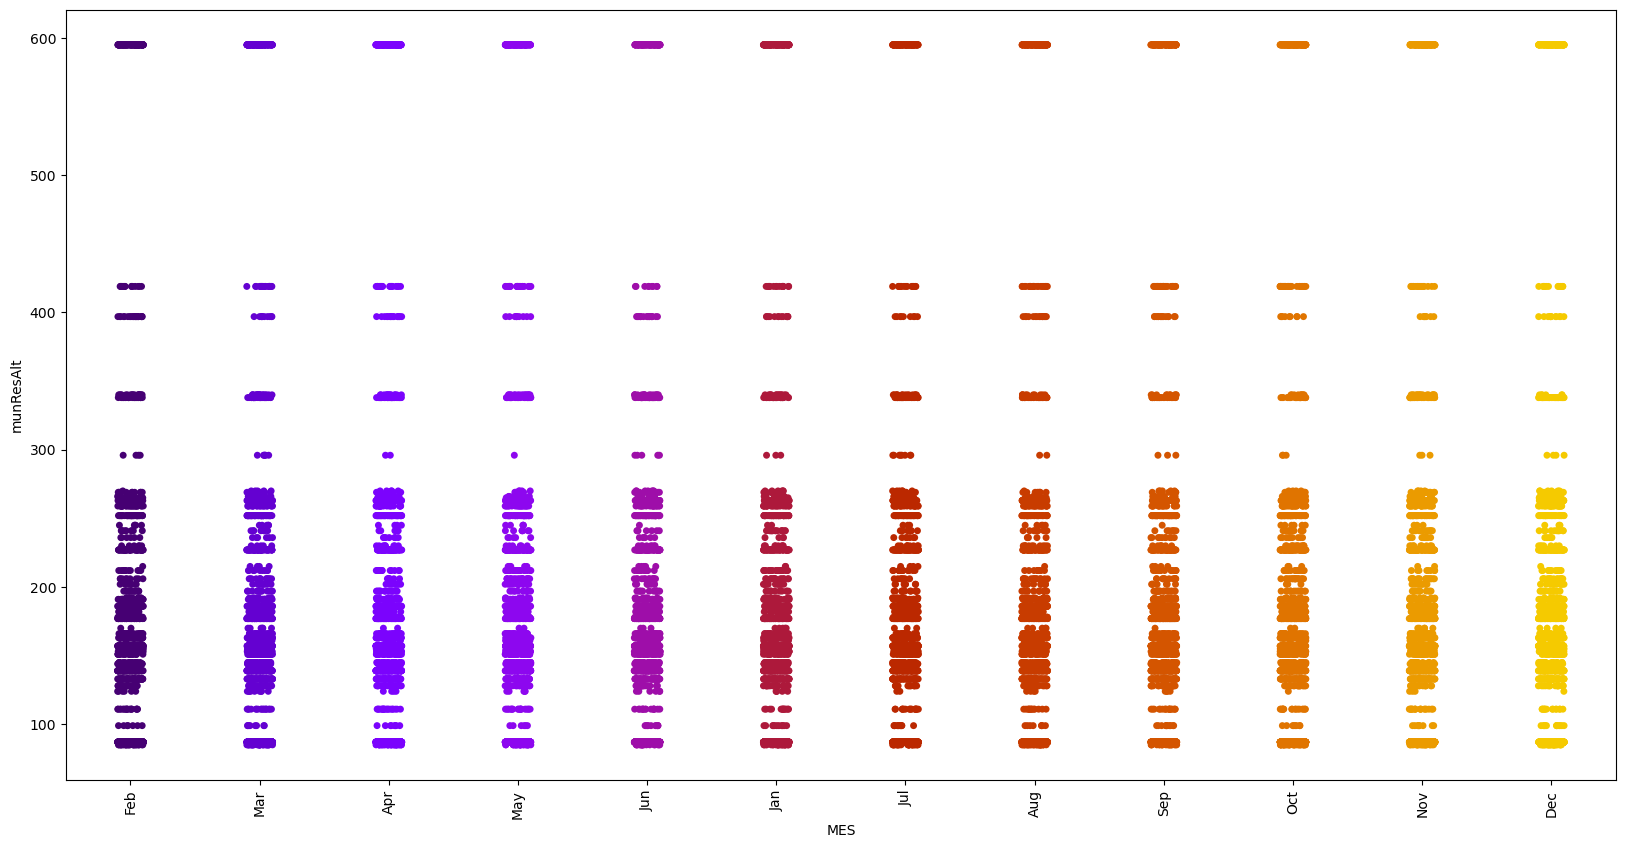

In [9]:
plt.figure(figsize=(20,10))
sns.stripplot(data=df,x='MES',y='munResAlt', palette='gnuplot')
plt.xticks(rotation=90);plt.show()

In [10]:
#200 escolhido

In [11]:
df['FAIXALT'] = df['munResAlt'].apply(lambda x: 'Acima de 200' if x > 200 else 'Abaixo de 200')

In [12]:
df[['FAIXALT','munResLon','SEMAGESTAC']].groupby('FAIXALT').aggregate(['sum','mean','min','max','median','std','var'])

munResLon                                           \
                        sum       mean       min       max    median   
FAIXALT                                                                
Abaixo de 200 -1.315691e+06 -63.172375 -65.32915 -61.04438 -63.82968   
Acima de 200  -3.803880e+05 -61.352898 -63.62499 -60.13858 -61.77331   

                                  SEMAGESTAC                                \
                    std       var        sum       mean   min   max median   
FAIXALT                                                                      
Abaixo de 200  1.035412  1.072079   759584.0  38.571269  19.0  45.0   39.0   
Acima de 200   0.934327  0.872966   235068.0  38.554699  21.0  45.0   39.0   

                                   
                    std       var  
FAIXALT                            
Abaixo de 200  2.047119  4.190698  
Acima de 200   1.915711  3.669949

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [13]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [14]:
#Preferi fazer o mapping antes, e fazer do modo convencional
df['REGIAO_IMEDIATA'] = df['munResNome'].map(imediatas)

In [15]:
df[['REGIAO_IMEDIATA','IDADEMAE']].groupby('REGIAO_IMEDIATA').mean()

,IDADEMAE
REGIAO_IMEDIATA,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


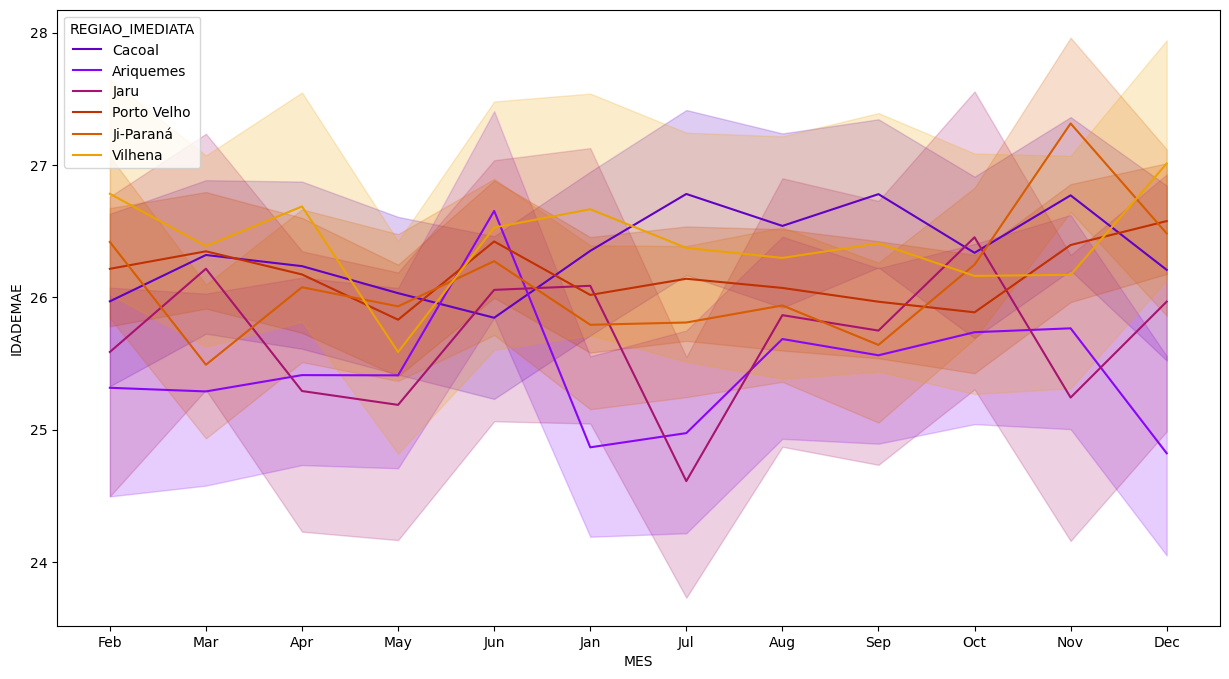

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='MES',y='IDADEMAE',hue='REGIAO_IMEDIATA',palette='gnuplot',);

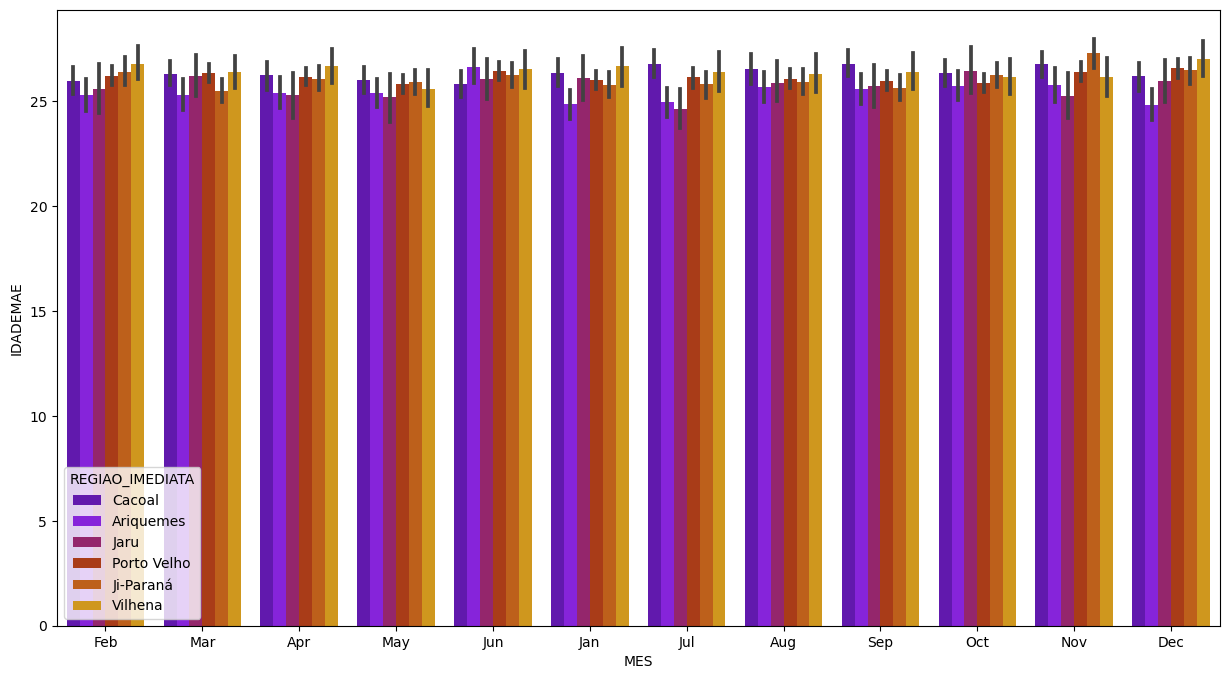

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x='MES',y='IDADEMAE',hue='REGIAO_IMEDIATA',palette='gnuplot');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [18]:
mapping={
    'Porto Velho':0.736,
    'Vilhena':0.731,
    'Cacoal':0.718,
    'Ji-Paraná' :0.714,
    'Pimenta Bueno' :0.710,
    'Ariquemes':  0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras':0.692,
    'Jaru':0.689,
    'Colorado do Oeste':0.685,
    'Ouro Preto do Oeste':0.682,
    "Espigão D'Oeste":0.672,
    "Santa Luzia D'Oeste":0.670,
    'Pimenteiras do Oeste': 0.665,
    'Presidente Médici':0.664,
    'Castanheiras':0.658,
    'Guajará-Mirim':0.657,
    'Chupinguaia':0.652,
    'Cabixi':0.650,
    'Candeias do Jamari':0.649,
    "São Felipe D'Oeste":0.649,
    'Cacaulândia':0.646,
    'São Miguel do Guaporé':0.646,
    'Mirante da Serra':0.643,
    "Alvorada D'Oeste":0.643,
    'Teixeirópolis':0.643,
    "Nova Brasilândia D'Oeste":0.643,
    'Rio Crespo':0.643,
    'Primavera de Rondônia':0.641,
    "Alta Floresta D'Oeste":0.641,
    'Ministro Andreazza':0.638,
    'Novo Horizonte do Oeste':0.634,
    'Vale do Paraíso':0.627,
    'Alto Paraíso':0.625,
    'Parecis':0.617,
    'Buritis':0.616,
    'Itapuã do Oeste':0.614,
    'Corumbiara':0.613,
    'Cujubim':0.612,
    'Costa Marques':0.611,
    'São Francisco do Guaporé':0.611,
    'Urupá':0.609,
    'Monte Negro':0.607,
    'Seringueiras':0.598,
    'Governador Jorge Teixeira':0.596,
    "Machadinho D'Oeste":0.596,
    'Campo Novo de ondônia':0.593,
    'Alto Alegre dos Parecis':0.592,
    'Theobroma':0.589,
    'Nova União':0.587,
    'Nova Mamoré':0.587,
   "Vale do Anari":0.584,
}

In [19]:
df['IDH'] = df['munResNome'].map(mapping)
#Fiz dessa forma o Lambda abaixo porque sei que não tem nhuma com IDH muito alto nem muito baixo 
df['IDHCLASS'] = df['IDH'].apply(lambda x: 'IDH-M alto' if x >= 0.700 else 'IDH-M médio' if x >= 0.600 else 'IDH-M baixo' )
df[df['IDHCLASS']=='IDH-M baixo']['munResNome'].value_counts()

Machadinho D'Oeste           500
Nova Mamoré                  432
Seringueiras                 168
Campo Novo de Rondônia       166
Alto Alegre dos Parecis      154
Governador Jorge Teixeira    112
Nova União                   104
Theobroma                     97
Vale do Anari                 93
Município ignorado - RO        1
Name: munResNome, dtype: int64

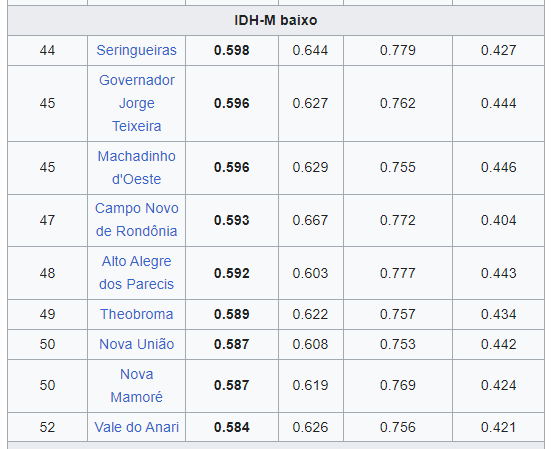

In [20]:
df.groupby('IDHCLASS').mean()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea,IDH
IDHCLASS,,,,,,,,,,,,,,,,,,,,,
IDH-M alto,1.0,3.310397e+06,111348.242539,1.008543,26.280332,2.550943,792048.701919,1.033960,0.272297,110017.123821,...,1.0,4.364996,0.636369,5.034530,743050.460516,-10.020071,-62.753020,167.972530,20118.411971,0.724795
IDH-M baixo,1.0,3.174347e+06,110030.420361,1.021346,25.326218,2.608985,774333.460159,1.072622,0.249852,110066.305966,...,1.0,4.163656,0.665025,4.969349,733621.376026,-10.429499,-63.122786,188.838992,6339.913756,0.591844
IDH-M médio,1.0,3.201453e+06,110631.362329,1.014977,25.884855,2.520092,807030.348967,1.088847,0.258667,110044.998203,...,1.0,4.290678,0.670261,4.855859,724759.414690,-11.089541,-62.678489,199.480350,5595.501201,0.649948


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [21]:
mapping = {
    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
    'Pimenta Bueno': 0.7383,
    'Porto Velho': 0.7257,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111,
    "Santa Luzia D'Oeste": 0.6850,
    'Rolim de Moura': 0.6785,
    'Chupinguaia': 0.6766,
    'São Miguel do Guaporé': 0.6699,
    'Pimenteiras do Oeste': 0.6501,
    'Teixeirópolis': 0.6500,
    'Colorado do Oeste': 0.6473,
    'Jaru': 0.6450,
    'Rio Crespo': 0.6430,
    'Primavera de Rondônia': 0.6384,
    "Alta Floresta D'Oeste": 0.6337,
    'Ouro Preto do Oeste': 0.6261,
    'São Francisco do Guaporé': 0.6214,
    'Candeias do Jamari': 0.6199,
    'Buritis': 0.6199,
    "São Felipe D'Oeste": 0.6153,
    'Presidente Médici': 0.6140,
    'Monte Negro': 0.6137,
    'Urupá': 0.6016,
    "Espigão D'Oeste": 0.6006,
    'Seringueiras': 0.6973,
    "Alvorada D'Oeste": 0.5922,
    'Itapuã do Oeste': 0.5919,
    'Cabixi': 0.5903,
    'Novo Horizonte do Oeste': 0.5887,
    "Nova Brasilândia D'Oeste": 0.5858,
    'Vale do Paraíso': 0.5857,
    'Corumbiara': 0.5818,
    'Alto Paraíso': 0.5759,
    'Cacaulândia': 0.5735,
    'Vale do Anari': 0.5721,
    'Ministro Andreazza': 0.5710,
    'Costa Marques': 0.5657,
    'Nova União': 0.5626,
    'Guajará-Mirim': 0.5571,
    'Mirante da Serra': 0.5541,
    'Parecis': 0.5519,
    'Castanheiras': 0.5502,
    'Theobroma': 0.5430,
    "Machadinho D'Oeste": 0.5405,
    'Campo Novo de Rondônia': 0.5322,
    'Nova Mamoré': 0.5272,
    'Cujubim': 0.5084,
    'Alto Alegre dos Parecis': 0.5055,
    'Governador Jorge Teixeira': 0.5046
}

In [22]:
df['IFDM'] = df['munResNome'].map(mapping)
df['IFDMCLASS'] = df['IFDM'].apply(lambda x: 'Desenvolvimento regular' if x < 0.6000 else 'Desenvolvimento moderado')
#fiz apenas duas classificações porque não tem desenvolvimento alto nem baixo.
df

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResArea,MES,FAIXALAT,FAIXAREA,FAIXALT,REGIAO_IMEDIATA,IDH,IDHCLASS,IFDM,IFDMCLASS
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,7067.025,Feb,abaixo de -10.5,acima de 3000,Acima de 200,Cacoal,0.641,IDH-M médio,0.6337,Desenvolvimento moderado
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,7067.025,Feb,abaixo de -10.5,acima de 3000,Acima de 200,Cacoal,0.641,IDH-M médio,0.6337,Desenvolvimento moderado
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,7067.025,Feb,abaixo de -10.5,acima de 3000,Acima de 200,Cacoal,0.641,IDH-M médio,0.6337,Desenvolvimento moderado
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,3958.273,Mar,abaixo de -10.5,acima de 3000,Acima de 200,Cacoal,0.592,IDH-M baixo,0.5055,Desenvolvimento regular
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,7067.025,Mar,abaixo de -10.5,acima de 3000,Acima de 200,Cacoal,0.641,IDH-M médio,0.6337,Desenvolvimento moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,11518.915,Dec,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.731,IDH-M alto,0.7465,Desenvolvimento moderado
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5126.723,Oct,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.652,IDH-M médio,0.6766,Desenvolvimento moderado
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,11518.915,Aug,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.731,IDH-M alto,0.7465,Desenvolvimento moderado
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,11518.915,Dec,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.731,IDH-M alto,0.7465,Desenvolvimento moderado


In [23]:
df.groupby('IFDMCLASS').mean()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea,IDH,IFDM
IFDMCLASS,,,,,,,,,,,,,,,,,,,,,
Desenvolvimento moderado,1.0,3.308544e+06,111154.040062,1.009395,26.210680,2.582642,792762.952602,1.034125,0.268905,110024.950587,...,4.336628,0.644228,4.933836,737894.370485,-10.301772,-62.658167,179.272248,16032.116746,0.707061,0.704461
Desenvolvimento regular,1.0,3.059698e+06,110450.065427,1.021510,25.502353,2.356267,810294.205168,1.150451,0.254870,110049.811338,...,4.287027,0.671745,5.182837,731054.754873,-10.763318,-63.244490,178.301815,7982.049527,0.621182,0.554598


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [24]:
mapp={
    
    'Porto Velho':17912070,
    'Ji-Paraná':3783972,
    'Vilhena':2831175,
    'Ariquemes':2579830,
    'Cacoal':2261644,
    'Jaru':1500890,
    'Rolim de Moura':1283434,
    'Pimenta Bueno':1164877,
    'Guajará-Mirim':893000,
    'Ouro Preto do Oeste':834000,
    'Buritis':726000,
    "Machadinho D'Oeste": 633000,
    "Espigão D'Oeste":625000,
    'São Miguel do Guaporé':616000,
    'Candeias do Jamari':548000,
    'Nova Mamoré':529000,
    'Cerejeiras':507000,
    "Alta Floresta D'Oeste":496000,
    'Presidente Médici':428000,
    'Cujubim':385000,
    "Nova Brasilândia D'Oeste":360000,
    'Alto Paraíso':358000,
    'São Francisco do Guaporé':353000,
    'Colorado do Oeste':335000,
    'Monte Negro':219152,
    'Alto Alegre dos Parecis':213410,
    'Campo Novo de Rondônia':208821,
    "Alvorada D'Oeste":204098,
    'Chupinguaia':190331,
    'Corumbiara':188218,
    'Ministro Andreazza':174633,
    'Urupá':172143,
    'Costa Marques':171878,
    'Seringueiras':169429,
    'Mirante da Serra':163955,
    'Governador Jorge Teixeira':148027,
    'Theobroma':140601,
    "Santa Luzia D'Oeste":135934,
    "Novo Horizonte do Oeste":129399,
    'Itapuã do Oeste':129351,
    'Vale do Paraíso':116742,
    'Cacaulândia':116635,
    'Cabixi':113031,
    'Vale do Anari':105208,
    'Nova União':92346,
    'Parecis':80759,
    'Rio Crespo':76854,
    'Pimenteiras do Oeste':76756,
    'Teixeirópolis':72089,
    "São Felipe D'Oeste":72084,
    'Castanheiras':59779,
    'Primavera de Rondônia':52908,
}


In [25]:
df['PIB'] = df['munResNome'].map(mapp)

df['PIBCLASS'] = df['PIB'].apply(
    lambda x: 'Acima de 1 Bilhão' if x >= 1000000 else
              'Acima de 500 Milhões' if x >= 500000 else
              'Acima de 300 Milhões' if x >= 300000 else
              'Acima de 200 Milhões' if x >= 200000 else
              'Acima de 100 Milhões' if x >= 100000 else
              'Até 100 Milhões'
)
df.tail()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,FAIXALAT,FAIXAREA,FAIXALT,REGIAO_IMEDIATA,IDH,IDHCLASS,IFDM,IFDMCLASS,PIB,PIBCLASS
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.731,IDH-M alto,0.7465,Desenvolvimento moderado,2831175.0,Acima de 1 Bilhão
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.652,IDH-M médio,0.6766,Desenvolvimento moderado,190331.0,Acima de 100 Milhões
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.731,IDH-M alto,0.7465,Desenvolvimento moderado,2831175.0,Acima de 1 Bilhão
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,abaixo de -10.5,acima de 3000,Acima de 200,Vilhena,0.731,IDH-M alto,0.7465,Desenvolvimento moderado,2831175.0,Acima de 1 Bilhão
27027,1,2795655.0,510792,1,18,5.0,8 a 11 anos,999992.0,1.0,0.0,...,abaixo de -10.5,abaixo de 3000,Acima de 200,Cacoal,0.634,IDH-M médio,0.5887,Desenvolvimento regular,129399.0,Acima de 100 Milhões


In [26]:
df[df['PIBCLASS']=='Até 100 Milhões']['munResNome'].value_counts()

Nova União                 104
Teixeirópolis               64
São Felipe D'Oeste          54
Rio Crespo                  50
Parecis                     44
Primavera de Rondônia       43
Pimenteiras do Oeste        40
Castanheiras                32
Município ignorado - RO      1
Name: munResNome, dtype: int64

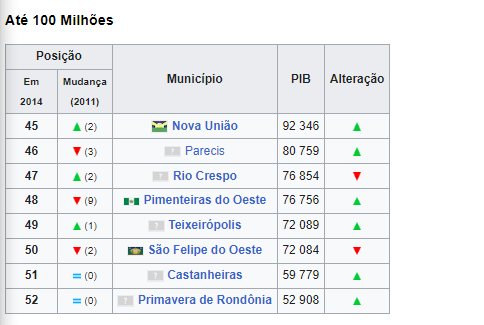

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

<AxesSubplot:>

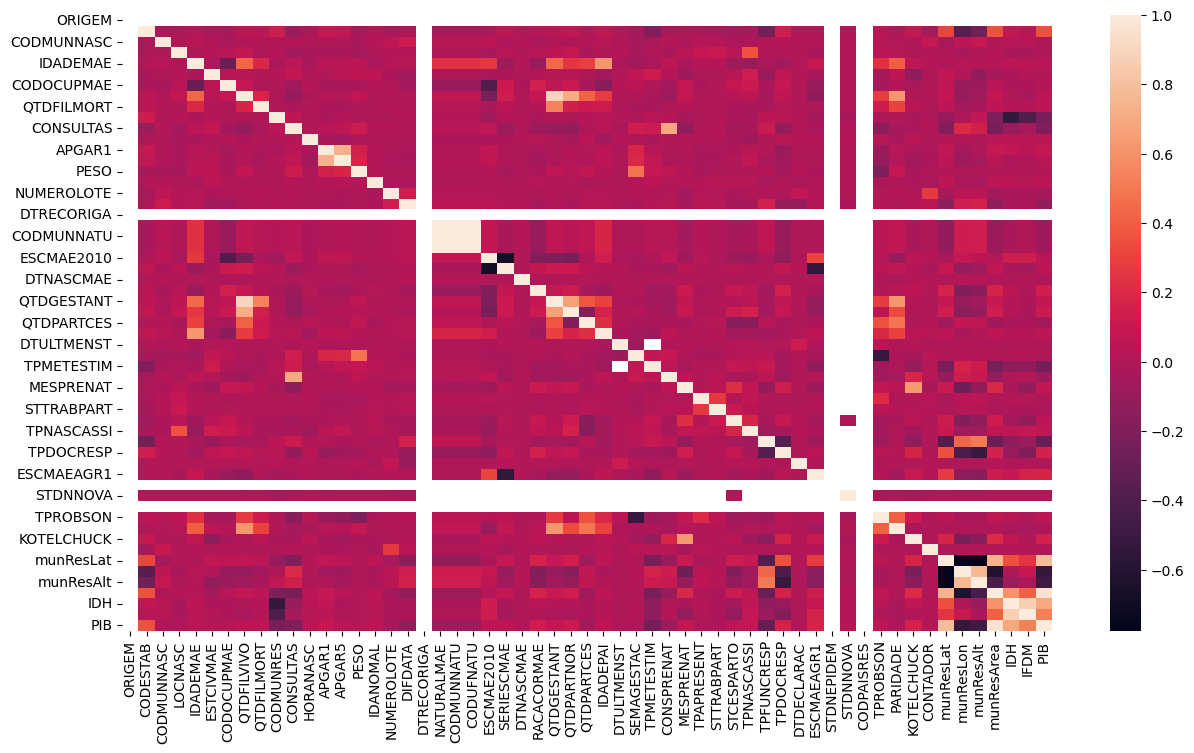

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr())

## Análise sobre PIB,IDH E IFDM em relação a escolaridade da Mãe.
Será que os niveis socioeconômicos têm impacto relacionado ao nível de escolaridade da mãe?

In [28]:
df[['IFDM','IDH','PIB']].describe()

,IFDM,IDH,PIB
count,26790.000000,26861.000000,2.702700e+04
mean,0.679495,0.693323,6.619578e+06
std,0.070662,0.046749,7.675212e+06
min,0.504600,0.584000,5.290800e+04
25%,0.621400,0.657000,6.250000e+05
50%,0.711700,0.714000,2.579830e+06
75%,0.725700,0.736000,1.791207e+07
max,0.774600,0.736000,1.791207e+07


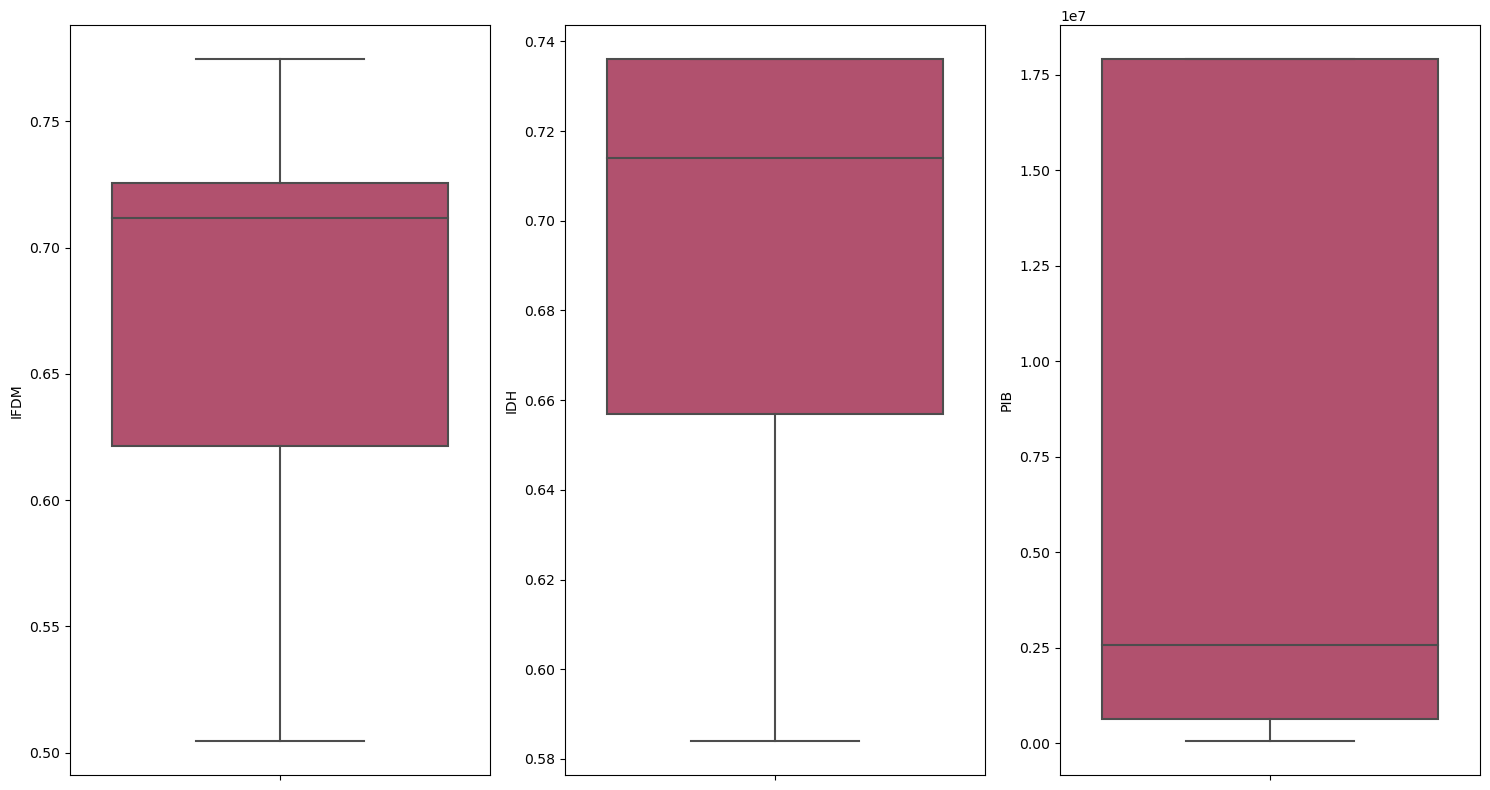

In [29]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
sns.boxplot(data=df,ax=ax[0],y='IFDM',palette='flare')
sns.boxplot(data=df,ax=ax[1],y='IDH',palette='flare')
sns.boxplot(data=df,ax=ax[2],y='PIB',palette='flare')

plt.tight_layout()
plt.show()

In [30]:
grouped = df.groupby('ESCMAE').agg({
    'PIB': ['mean','median'],
    'IDH': ['mean','median'],
    'IFDM': ['mean','median']
})
display(grouped)

PIB                  IDH             IFDM        
                         mean     median      mean median      mean  median
ESCMAE                                                                     
1 a 3 anos       7.165454e+06  2579830.0  0.684455  0.702  0.672691  0.7257
12 anos ou mais  7.301234e+06  2831175.0  0.702916  0.714  0.692975  0.7257
4 a 7 anos       7.086966e+06  2579830.0  0.688762  0.702  0.673463  0.7117
8 a 11 anos      6.133105e+06  2261644.0  0.691284  0.710  0.676470  0.7117
Nenhuma          6.813642e+06  2579830.0  0.689575  0.702  0.674273  0.7117

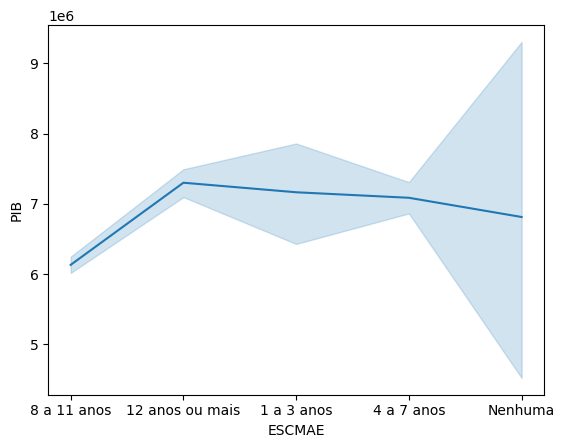

In [31]:
sns.lineplot(data=df, x='ESCMAE', y='PIB', palette='viridis');

<AxesSubplot:xlabel='ESCMAE', ylabel='IDH'>

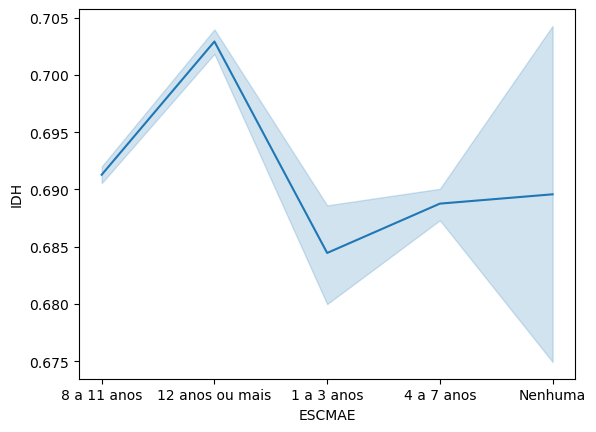

In [32]:
sns.lineplot(data=df, x='ESCMAE', y='IDH', palette='viridis')

<AxesSubplot:xlabel='ESCMAE', ylabel='IFDM'>

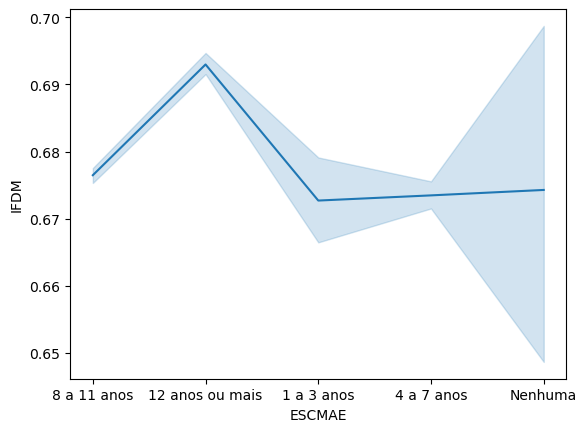

In [33]:
sns.lineplot(data=df, x='ESCMAE', y='IFDM', palette='viridis')

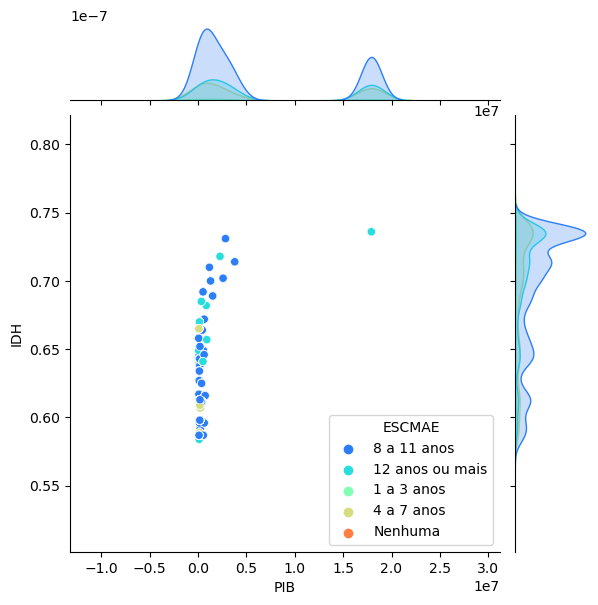

In [34]:
sns.jointplot(data=df,x='PIB',y='IDH',hue='ESCMAE',palette='rainbow')

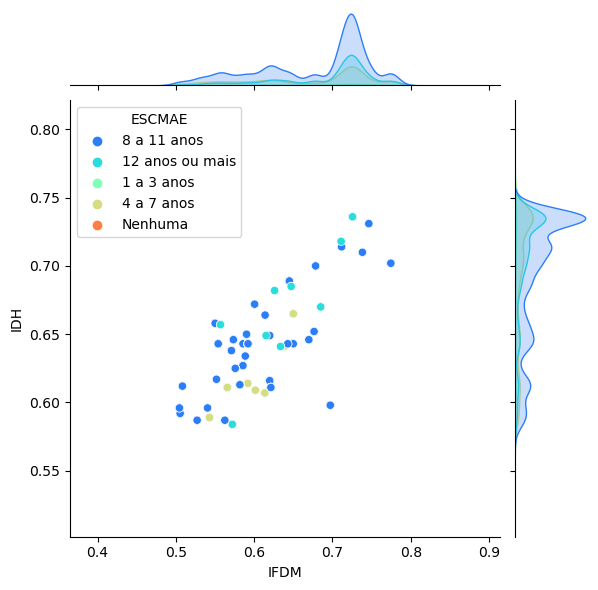

In [35]:
sns.jointplot(data=df,x='IFDM',y='IDH',hue='ESCMAE',palette='rainbow',);

# 6. Anomalias Congênitas e Indicadores Socioeconômicos

In [42]:
a =df[['IDANOMAL','PIBCLASS']].groupby('PIBCLASS').mean();a

,IDANOMAL
PIBCLASS,
Acima de 1 Bilhão,2.041419
Acima de 100 Milhões,2.018013
Acima de 200 Milhões,2.002770
Acima de 300 Milhões,2.010650
Acima de 500 Milhões,2.005150
Até 100 Milhões,2.006944


In [50]:
b=df[['IDANOMAL','IDHCLASS']].groupby('IDHCLASS').mean();b

,IDANOMAL
IDHCLASS,
IDH-M alto,2.043089
IDH-M baixo,2.005519
IDH-M médio,2.009747


In [52]:
c=df[['IDANOMAL','IFDMCLASS']].groupby('IFDMCLASS').mean();c

,IDANOMAL
IFDMCLASS,
Desenvolvimento moderado,2.034690
Desenvolvimento regular,2.006979


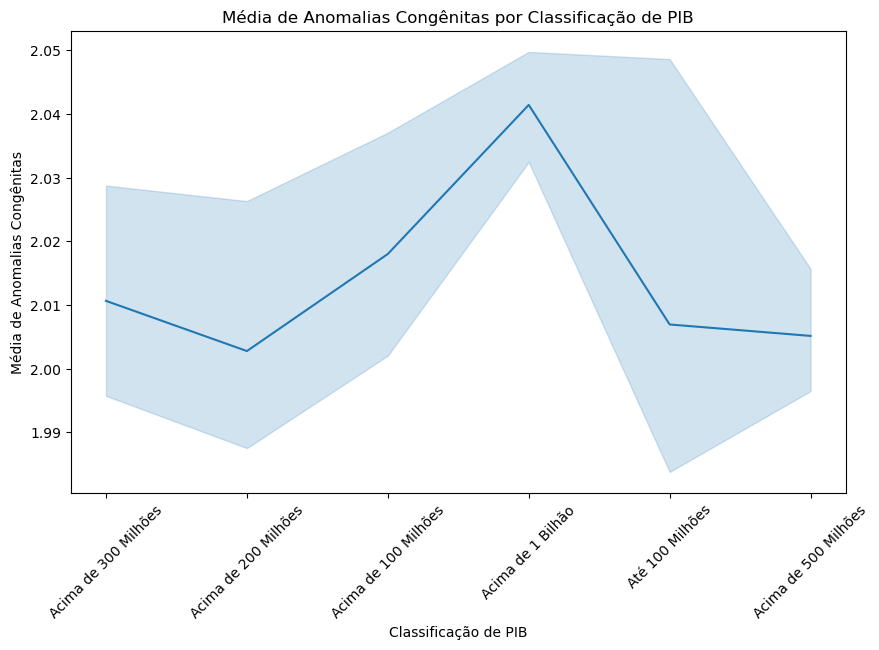

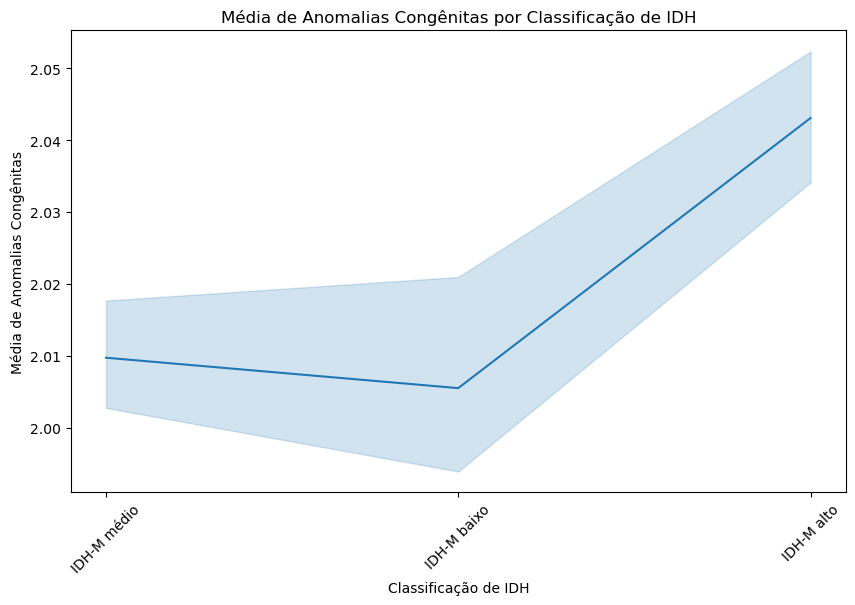

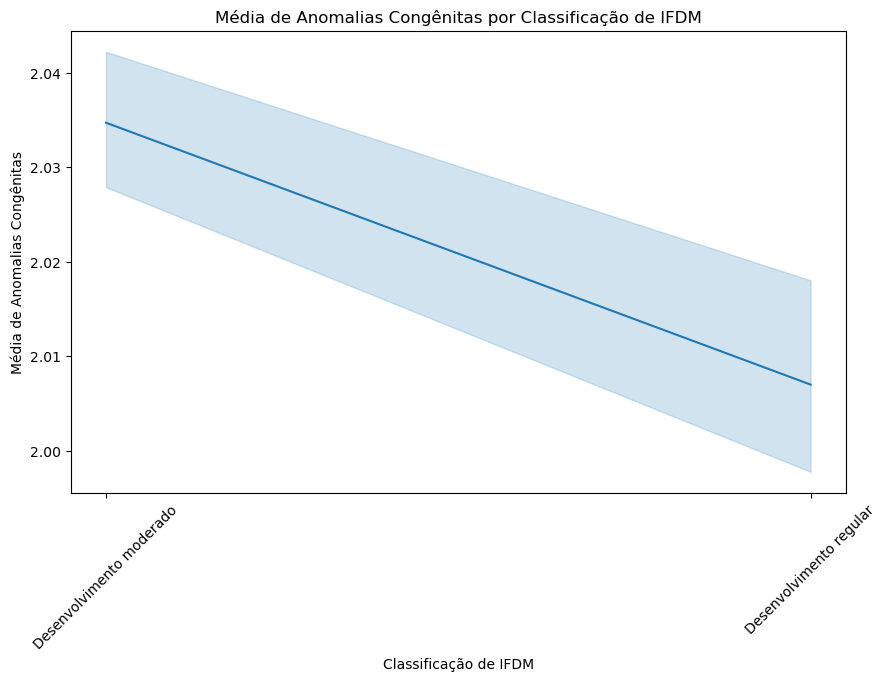

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='PIBCLASS', y='IDANOMAL', data=df)
plt.title('Média de Anomalias Congênitas por Classificação de PIB')
plt.xlabel('Classificação de PIB')
plt.ylabel('Média de Anomalias Congênitas')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='IDHCLASS', y='IDANOMAL', data=df)
plt.title('Média de Anomalias Congênitas por Classificação de IDH')
plt.xlabel('Classificação de IDH')
plt.ylabel('Média de Anomalias Congênitas')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='IFDMCLASS', y='IDANOMAL', data=df)
plt.title('Média de Anomalias Congênitas por Classificação de IFDM')
plt.xlabel('Classificação de IFDM')
plt.ylabel('Média de Anomalias Congênitas')
plt.xticks(rotation=45)
plt.show()

Parece que apenas IFDM e IDH têm uma ligeira relação com casos de anomalias congênitas

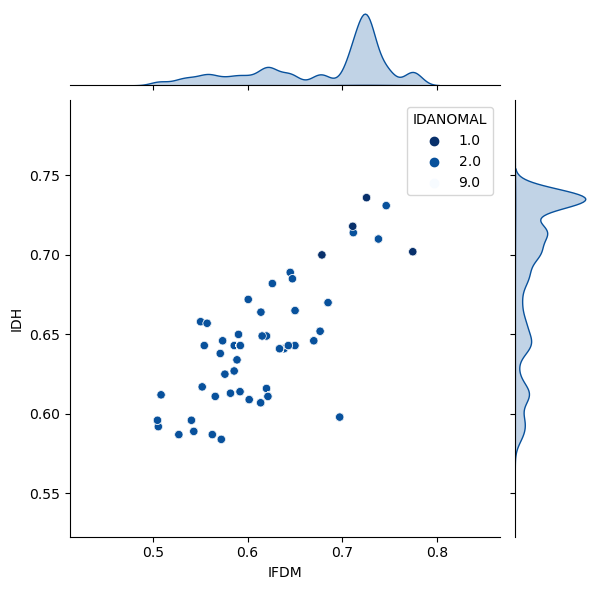

In [76]:
sns.jointplot(data=df,x='IFDM',y='IDH',hue='IDANOMAL',palette='Blues_r',);

Não consegui extrair muita coisa, não soube fazer nem pensar em algo interessante.

Investiguei dois pontos que eu achei que eram importantes mas que no final nessa base não me levaram a nada